## Analysing Uttarakhand COVID19 data

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covid_19_india.csv")
df.groupby(by='State/UnionTerritory')

In [3]:
df

,Unnamed: 0,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,0,1,30/01/2020,6:00 PM,Kerala,1,0,0,0,1
1,1,2,31/01/2020,6:00 PM,Kerala,1,0,0,0,1
2,2,3,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,4,5,3/2/2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
2986,2986,2987,13/06/2020,8:00 AM,Tripura,-,-,278,1,961
2987,2987,2988,13/06/2020,8:00 AM,Uttarakhand,-,-,947,21,1724
2988,2988,2989,13/06/2020,8:00 AM,Uttar Pradesh,-,-,7609,365,12616
2989,2989,2990,13/06/2020,8:00 AM,West Bengal,-,-,4206,451,10244


In [4]:
UK = df[df['State/UnionTerritory'] == 'Uttarakhand']

In [5]:
UK

,Unnamed: 0,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
161,161,162,15/03/2020,6:00 PM,Uttarakhand,1,0,0,0,1
176,176,177,16/03/2020,6:00 PM,Uttarakhand,1,0,0,0,1
191,191,192,17/03/2020,6:00 PM,Uttarakhand,1,0,0,0,1
207,207,208,18/03/2020,6:00 PM,Uttarakhand,1,0,0,0,1
226,226,227,19/03/2020,6:00 PM,Uttarakhand,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2842,2842,2843,9/6/2020,8:00 AM,Uttarakhand,-,-,714,13,1411
2878,2878,2879,10/6/2020,8:00 AM,Uttarakhand,-,-,755,13,1537
2915,2915,2916,11/6/2020,8:00 AM,Uttarakhand,-,-,831,15,1562
2951,2951,2952,12/6/2020,8:00 AM,Uttarakhand,-,-,842,15,1643


In [6]:
UK['Date'] = pd.to_datetime(UK['Date'], format='%d/%m/%Y')

C:\Users\ak.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 161 to 2987
Data columns (total 10 columns):
Unnamed: 0                  91 non-null int64
Sno                         91 non-null int64
Date                        91 non-null datetime64[ns]
Time                        91 non-null object
State/UnionTerritory        91 non-null object
ConfirmedIndianNational     91 non-null object
ConfirmedForeignNational    91 non-null object
Cured                       91 non-null int64
Deaths                      91 non-null int64
Confirmed                   91 non-null int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 7.8+ KB


In [8]:
UK.sort_values(by='Date',inplace=True)
UK.set_index('Date',inplace=True)

C:\Users\ak.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
UK

,Unnamed: 0,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,,
2020-03-15,161,162,6:00 PM,Uttarakhand,1,0,0,0,1
2020-03-16,176,177,6:00 PM,Uttarakhand,1,0,0,0,1
2020-03-17,191,192,6:00 PM,Uttarakhand,1,0,0,0,1
2020-03-18,207,208,6:00 PM,Uttarakhand,1,0,0,0,1
2020-03-19,226,227,6:00 PM,Uttarakhand,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2020-06-09,2842,2843,8:00 AM,Uttarakhand,-,-,714,13,1411
2020-06-10,2878,2879,8:00 AM,Uttarakhand,-,-,755,13,1537
2020-06-11,2915,2916,8:00 AM,Uttarakhand,-,-,831,15,1562


In [10]:
UK = UK.drop(["Unnamed: 0", "Sno", "Time","State/UnionTerritory","ConfirmedIndianNational","ConfirmedForeignNational"], axis=1)

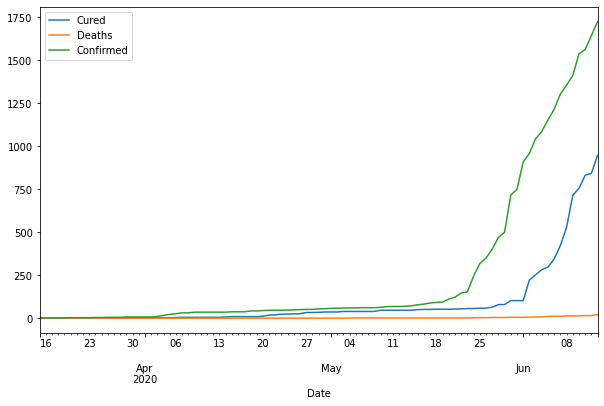

In [12]:
UK.plot(figsize=(10,6))

## SIR Modeling for Uttarakhand

### We need population data

In [13]:
population = pd.read_csv("population_india_census2011.csv")

In [14]:
population

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931
5,6,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996
6,7,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928
7,8,Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973
8,9,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919
9,10,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993


#### From 2011 census data its 10086292	 for Uttarakhand

## SIR Model

In [15]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in I population over time
    dIdt = beta * S * I / N - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

We'll start by modeling our population.

Effective contact rate is transmission rate * contact rate, so:

For example, 5% transmission rate and 5 contacts a day is 0.05 * 5 = 0.25
Recovery rate is 1 / days, so

For example, 4 day recovery rate is 1 / 4 = 0.25

R0 is 2.0


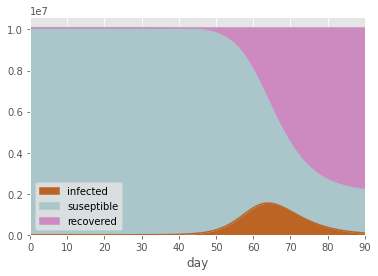

In [16]:
effective_contact_rate = 0.5
recovery_rate = 1/4

# We'll compute this for fun
print("R0 is", effective_contact_rate / recovery_rate)

# What's our start population look like?
# Everyone not infected or recovered is susceptible
total_pop = 10086292
recovered = 0
infected = 1
susceptible = total_pop - infected - recovered

# A list of days, 0-91
days = range(0, 91)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, infected, recovered],
             days,
             args=(total_pop, effective_contact_rate, recovery_rate))
S, I, R = ret.T

# Build a dataframe because why not
df = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',
        stacked=True)